In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind

In [121]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
# import R's "base" package
utils = importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
from rpy2.robjects.vectors import StrVector

packnames = ['lme4', 'optimx', 'pbkrtest', 'lmerTest',
             'ggplot2', 'dplyr', 'sjPlot', 'car']

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [122]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr



# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [123]:
# home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'

map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [124]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

In [125]:
# helper functions
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

# add p-value to figure
def text(p):
    if p == 0:
        axs.text((x1+x2)*.5, y+h,  r"$p = {:.1f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    elif p < 0.001:
        axs.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize = 8)
    elif p > 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.2f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

    elif 0.01 < p < 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.3f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    else:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.4f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

## action RT

In [126]:
# choice-level all action RT
# index_start = data_choice_level.index[data_choice_level['RT'] == -1]
# RT_first_move = data_choice_level.loc[index_start+1,:]
# index_later = data_choice_level.index[(data_choice_level['RT'] != -1) & (data_choice_level['submit'] != 1)& (data_choice_level['undo'] != 1)]
# RT_later_move = data_choice_level.loc[index_later,:]
# index_submit = data_choice_level.index[data_choice_level['submit'] == 1]
# RT_submit = data_choice_level.loc[index_submit,:]

<IPython.core.display.Javascript object>


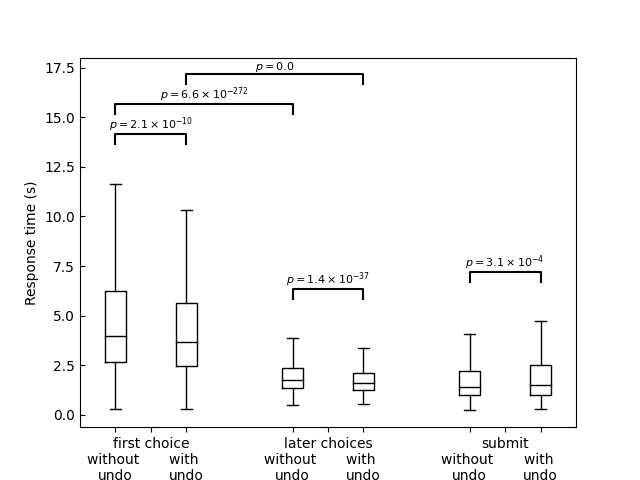

In [127]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# df_part = df.loc[df['sub'] == subs[i],['f_t_rc','f_t_undo',
#                  'm_t_everyact_rc','m_t_everyc_undo',
#                  't_s_rc','t_s_undo']]

# undobox = []
# for x in t_everyundo[48*i:48*(i+1)]:
#     try: 
#         undobox.append(median(x))
#     except:  pass

# axs[i].plot([1,2],[f_t_rc[48*i:48*(i+1)], f_t_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([2.5,3.5],[[median(x) for x in t_everyact_rc[48*i:48*(i+1)]], [median(x) for x in t_everyc_undo[48*i:48*(i+1)]]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([4,5],[t_s_rc[48*i:48*(i+1)],t_s_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 

# plot with puzzle-level RT
bx = axs.boxplot([puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit']],
   positions =[1,2,3.5,4.5,6,7],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #
    
# normality test
# Shapiro-Wilk Test
    
# stats = [np.nan]*6
# ps = [np.nan]*6
# for s in range(len(stats)):
#     stats[s],ps[s]  = shapiro([math.log2(x) for x in df_part.iloc[:,s]])
#     print('Statistics=%.3f, p=%.3f' % (stats[s], ps[s]))
#     # interpret
#     alpha = 0.05
#     if ps[s] > alpha:
#         print('Sample looks Gaussian (fail to reject H0)')
#     else:
#         print('Sample does not look Gaussian (reject H0)')   
    
#     from scipy.stats import anderson
#     result = [np.nan]*6
#     for s in range(len(result)):
#         result[s]= anderson([math.log2(x) for x in df_part.iloc[:,s]])
#         print('Statistic: %.3f' % result[s].statistic)
#         p = 0
#         for i in range(len(result[s].critical_values)):
#         	sl, cv = result[s].significance_level[i], result[s].critical_values[i]
#         	if result[s].statistic < result[s].critical_values[i]:
#         		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
#         	else:
#         		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    
# run paired-sample t test
stat1, p1 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'])
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 3.5,4.5  
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit'])

x1, x2 = 6,7 
y, h, col = bx['caps'][11]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
stat4, p4 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'])

x1, x2 = 1,3.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p4)
#--------------------------------------
stat5, p5 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 2,4.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p5)

#--------------------------------------
axs.set_xticks([1,1.5,2, 3.5,4,4.5, 6,6.5,7])
axs.set_xticklabels(labels = ['\nwithout \nundo','first choice','\nwith \nundo','\nwithout \nundo','later choices','\nwith \nundo', '\nwithout \nundo','submit','\nwith \nundo'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'action_RT.png', dpi=600, bbox_inches='tight')

## different types of undoing RT

In [130]:
index_singleUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1)&(data_choice_level['lastUndo'] == 1)]
RT_singleUndo = data_choice_level.loc[index_singleUndo,:]

index_firstUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1) &(data_choice_level['lastUndo'] != 1)]
RT_firstUndo = data_choice_level.loc[index_firstUndo,:]
index_laterUndo = data_choice_level.index[(data_choice_level['firstUndo'] != 1) & (data_choice_level['undo'] == 1)]
RT_laterUndo = data_choice_level.loc[index_laterUndo,:]

<IPython.core.display.Javascript object>


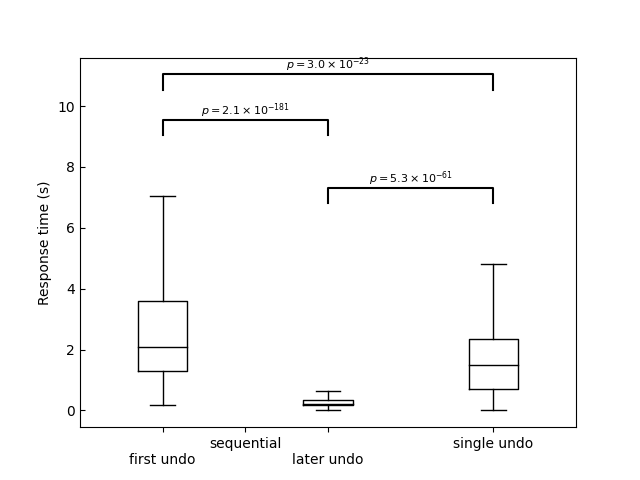

In [131]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
axs.set_xticks([1,1.5,2,3])
axs.set_xticklabels(labels = ['\nfirst undo','sequential','\nlater undo','single undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')

31.63923556115462 2.1196056054293853e-181
-18.598574768787156 5.2829319023665354e-61
10.063996947789956 3.034098867216916e-23
(0.44652867317199707, 0.0)
(0.20164453983306885, 0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<IPython.core.display.Javascript object>


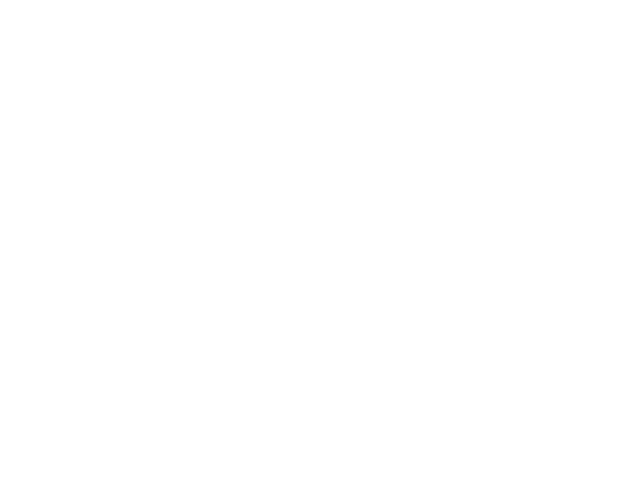

In [103]:
print(stat1, p1)
print(stat2, p2)
print(stat3, p3)


import scipy
print(scipy.stats.shapiro(RT_firstUndo['undoRT']/1000))
print(scipy.stats.shapiro(RT_laterUndo['undoRT']/1000))
import statsmodels.api as sm
import pylab as py
sm.qqplot(RT_firstUndo['undoRT']/1000, line ='45')
py.show()

<IPython.core.display.Javascript object>


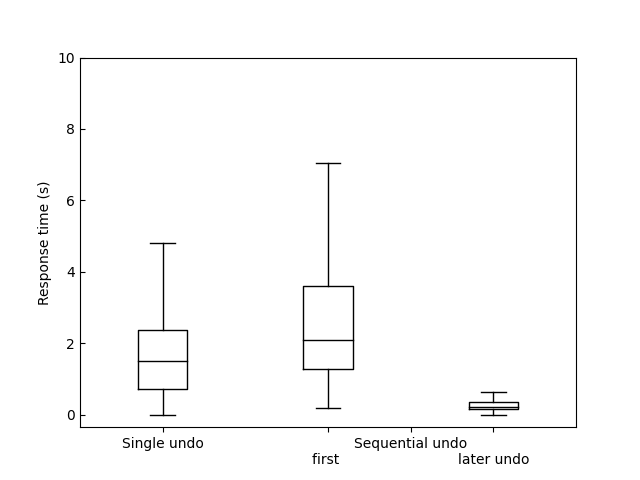

In [149]:
# flip order
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
#    positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
#    medianprops = dict(color = 'k'))  #
bx = axs.boxplot([RT_singleUndo['undoRT']/1000, RT_firstUndo['undoRT']/1000, RT_laterUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p1)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p3)


#--------------------------------------
stat2, p2 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 7, 0.5, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p2)


#--------------------------------------
axs.set_yticks([0,2,4,6,8,10])
axs.set_xticks([1,2,2.5,3])
axs.set_xticklabels(labels = ['Single undo','\nfirst ','Sequential undo','\nlater undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'undo_RT.pdf', dpi=600, bbox_inches='tight')

In [139]:
RT_singleUndo['undoRT']

237       4159.0
254       4054.0
920       3907.0
1008      5633.0
1020      3045.0
           ...  
111308    3068.0
111380      -1.0
111981    1964.0
112248      -1.0
112341    2461.0
Name: undoRT, Length: 569, dtype: float64

## budget before submit/undo at the end of trial

In [106]:
# only undo condition
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]
index_end_undo = df_beforeUndo.index[df_beforeUndo['checkEnd'] == 1]
leftover_undo = df_beforeUndo.loc[index_end_undo,'leftover']

index_notundo = data_choice_level.index[(data_choice_level['undo'] == 0)&(data_choice_level['RT'] != -1)]
df_notbeforeUndo = data_choice_level.loc[index_notundo-1,:]
index_end_notundo = df_notbeforeUndo.index[(df_notbeforeUndo['checkEnd'] == 1)&(df_notbeforeUndo['condition'] == 1)]
leftover_notundo = df_notbeforeUndo.loc[index_end_notundo,'leftover']

<IPython.core.display.Javascript object>


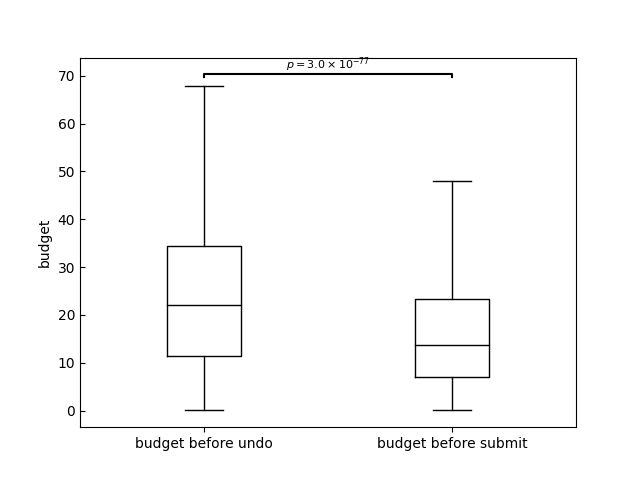

In [140]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([leftover_undo,leftover_notundo],
   positions =[1,2],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(leftover_undo,leftover_notundo,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['budget before undo','budget before submit'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('budget') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'budget_before_submit_undo.png', dpi=600, bbox_inches='tight')

### counts of errors before undo (by accumulated severity)

In [108]:
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]

MAS_trial = df_beforeUndo['allMAS']
accu_severity_error = MAS_trial - df_beforeUndo['currMas']
groupby_error = accu_severity_error.value_counts()
print(groupby_error/sum(groupby_error))

1    0.468289
0    0.231932
2    0.212758
3    0.062684
4    0.022493
5    0.001475
6    0.000369
dtype: float64


<IPython.core.display.Javascript object>


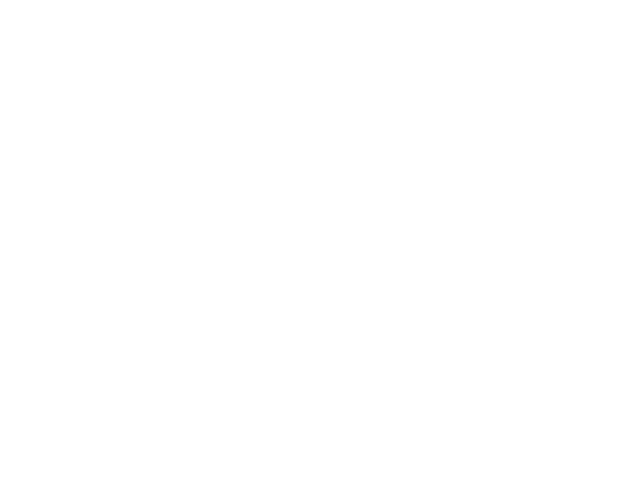

In [109]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar(groupby_error.index,groupby_error/sum(groupby_error))
axs.set_ylabel('proportion of first undo')
axs.set_xlabel('accumulated error before first undo action')
plt.show()
fig.savefig(out_dir + 'undo_accumulated_error.pdf', dpi=600, bbox_inches='tight')

In [110]:
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]

instant_severity_error = df_beforeUndo['severityOfErrors']
groupby_error_instant = instant_severity_error.value_counts()
print(groupby_error_instant)

0    2377
1     272
2      44
3      16
4       2
6       1
Name: severityOfErrors, dtype: int64


<IPython.core.display.Javascript object>


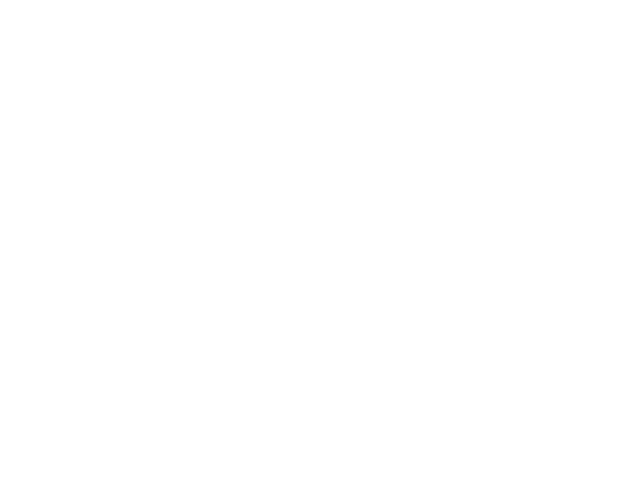

In [111]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar(groupby_error_instant.index,groupby_error_instant/sum(groupby_error_instant))
axs.set_ylabel('proportion of first undo')
axs.set_xlabel('instant error before first undo action')
plt.show()
fig.savefig(out_dir + 'undo_instant_error.pdf', dpi=600, bbox_inches='tight')

### conditional probability version of two figures above,

In [112]:
index_error = puzzle_error.index[puzzle_error == 0]
print(index_error)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            113570, 113571, 113572, 113573, 113574, 113575, 113576, 113577,
            113578, 113579],
           dtype='int64', length=67661)


In [141]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']
    
    # no error
    index_error = puzzle_error.index[puzzle_error == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))


    # YES error
    index_error = puzzle_error.index[puzzle_error != 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    
    dat_subjects.append(temp_data)

dat_subjects = np.array(dat_subjects)
print(np.mean(dat_subjects,axis=0))

[0.04206835 0.14598477]


<IPython.core.display.Javascript object>


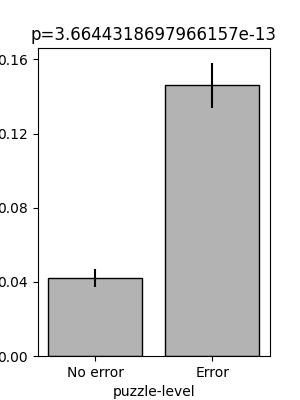

-7.785493757374803
3.6644318697966157e-13


Text(0.5, 1.0, 'p=3.6644318697966157e-13')

In [142]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_yticks(np.linspace(0,0.16,5))
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('puzzle-level')
plt.show()
fig.savefig(out_dir + 'conditional_undo_masError.pdf', dpi=600, bbox_inches='tight')

from scipy.stats import ttest_ind
stat1, p1 = ttest_ind(dat_subjects[:,0], dat_subjects[:,1])
print(stat1)
print(p1)
axs.set_title('p=' + str(p1))


In [115]:
import scipy
scipy.stats.shapiro(dat_subjects[:,1])


(0.9206253290176392, 1.387115571560571e-05)

In [116]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    # no error
    index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))


    # YES error
    index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] != 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
    
    dat_subjects.append(temp_data)

dat_subjects = np.array(dat_subjects)

<IPython.core.display.Javascript object>


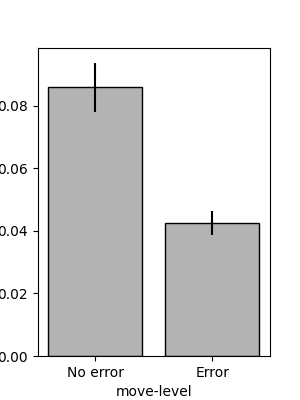

In [117]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('move-level')
plt.show()
fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')

4.914966453546378
1.8456446684763362e-06


<IPython.core.display.Javascript object>


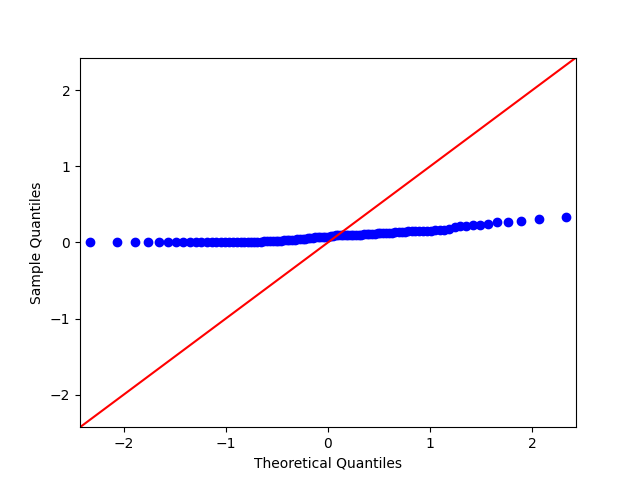

In [118]:
ttest_ind
stat1, p1 = ttest_ind(dat_subjects[:,0], dat_subjects[:,1])
print(stat1)
print(p1)
import statsmodels.api as sm
import pylab as py
sm.qqplot(dat_subjects[:,0], line ='45')
py.show()

In [87]:
import scipy
scipy.stats.shapiro(dat_subjects[:,1])

(0.8958092927932739, 8.130836590680701e-07)

In [549]:
# FROM ALL SUBJECTS

data_choice_level['severityOfErrors']
dat = []

# no error
index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] == 0]
index_error += 1
index_error = np.array(index_error)
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
# dat.append(np.mean(data_choice_level['undo'][index_error]))
dat.append(np.mean(data_choice_level['firstUndo'][index_error]))


# YES error
index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] != 0]
index_error += 1
index_error = np.array(index_error)
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
# dat.append(np.mean(data_choice_level['undo'][index_error]))
dat.append(np.mean(data_choice_level['firstUndo'][index_error]))

In [550]:
dat

[0.02241860640585506, 0.044318031485646246]

<IPython.core.display.Javascript object>


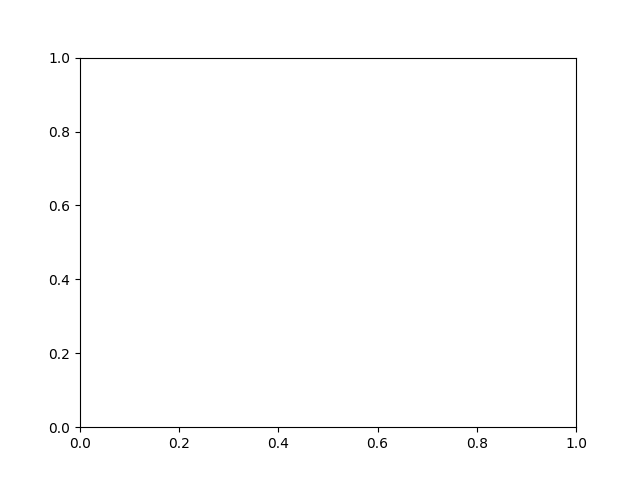

NameError: name 'dat' is not defined

In [143]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],dat,color=[.7,.7,.7], edgecolor = 'k')
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
plt.show()
fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')



## benefit of undo - number of full undoing

In [552]:
basic_score = puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'].reset_index(drop=True)
basic_score_z = basic_score/puzzleID_order_data[puzzleID_order_data['condition']==0]['mas'].reset_index(drop=True)
single_condition_data['numCities_z'] = single_condition_data['numCities']/single_condition_data['mas']

single_condition_data['undo_benefit'] = single_condition_data['numCities'] - basic_score
single_condition_data['undo_benefit_z'] = single_condition_data['numCities_z'] - basic_score_z

undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()

In [553]:
benefit_undo = (np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities']) 
        - np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities']))

undo_count = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numFullUndo'])

yerr = stats.binned_statistic(undo_count, benefit_undo, statistic=lambda y: np.std(y)/np.sqrt(len(y)), bins=[0,1,2,3,4,100])
bins = stats.binned_statistic(undo_count, benefit_undo, 'mean', bins=[0,1,2,3,4,100])

<IPython.core.display.Javascript object>


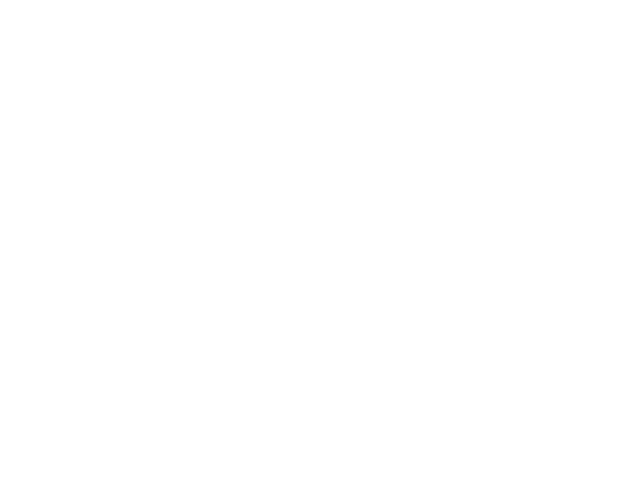

In [554]:
fig, axs = plt.subplots()         
axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)
plotline1, caplines1, barlinecols1 = axs.errorbar(bins[1][:-1], bins[0], yerr[0], capsize = 0, ls='None', color='k')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 1,4  
y, h, col = bins[0][1] + 0.1, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

stat2, p2 = stats.kruskal(benefit_undo[undo_count==0], benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 0,4  
y, h, col = bins[0][1] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

axs.set_xticks([0,1,2,3,4])
axs.set_xticklabels([0,1,2,3,'4+'])
axs.set_xlabel('number of full undoing')
axs.set_ylabel('benefit of undo (n_undo - n_basic)')
fig.savefig(out_dir + 'undobenefit_undonum.png', dpi=600, bbox_inches='tight')

In [555]:
scatter_data = single_condition_data.groupby(['undo_benefit','numFullUndo'])['index'].size().to_frame(name = 'count').reset_index()

In [556]:
scatter_data['count']

0        1
1        6
2        1
3       38
4        2
5       98
6       18
7        5
8        1
9      484
10     101
11      36
12      18
13       6
14       5
15       2
16       1
17    1738
18     438
19     148
20      84
21      44
22      14
23      13
24      10
25       6
26       1
27       2
28       2
29       1
30     598
31     221
32      77
33      37
34      16
35      12
36       4
37       3
38       2
39       1
40     170
41      56
42      19
43       4
44       6
45       1
46       1
47      48
48      16
49       1
50       2
51       1
52      17
53       3
54       2
55       1
56       1
57       2
Name: count, dtype: int64

In [557]:
# %matplotlib notebook
# fig1, ax1 = plt.subplots()
# sns.scatterplot(scatter_data['numFullUndo'], scatter_data['undo_benefit'], size = scatter_data['count'], sizes = (3,100), data=scatter_data) 
# ax1.set_xlabel("number of undo")
# ax1.set_ylabel("benefit of undo")

In [558]:
undo_puzzle = single_condition_data[single_condition_data['numUNDO']>0].groupby(['subjects']).size()
count = [len(single_condition_data.groupby(['subjects']).size())]
for i in range(1,47):
    count.append(sum(undo_puzzle>=i))

<IPython.core.display.Javascript object>


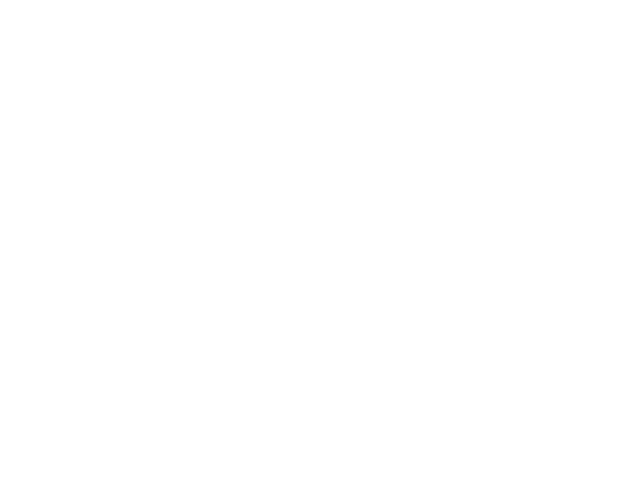

Text(0, 0.5, 'number of subjects')

In [559]:
fig, axs = plt.subplots()

plt.bar(list(range(0,47)),count)
axs.set_xlabel("undo in >= number of puzzles")
axs.set_ylabel("number of subjects")
# axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)

<IPython.core.display.Javascript object>


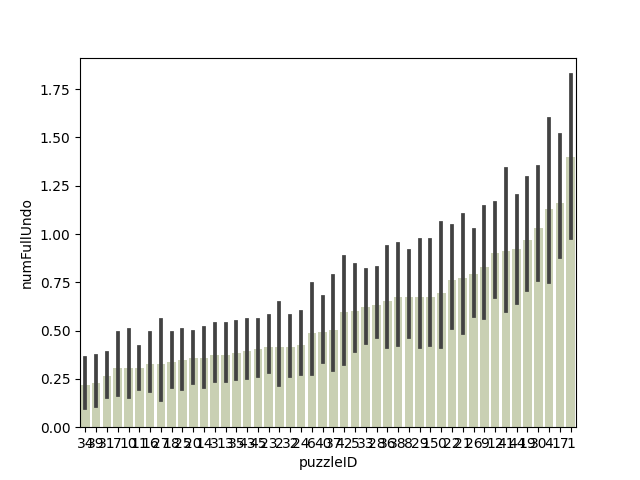

In [560]:
order = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

%matplotlib notebook
fig, axs = plt.subplots(1, 1)

bx = sns.barplot(x='puzzleID', y='numFullUndo', data = single_condition_data, color = '#ccd5ae',order=sort_order.index) 


<IPython.core.display.Javascript object>


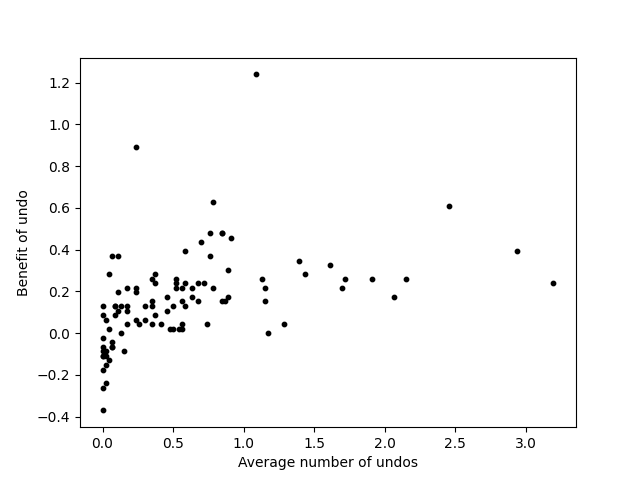

In [563]:
#TODO: with a caption stating that each point is a subject, the Spearman rho, and the p-value
fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(undo_count_sub,undo_benefit_sub,10,c='k')
ax1.set_xlabel("Average number of undos")
ax1.set_ylabel("Benefit of undo")
fig1.savefig(out_dir + 'benefit_undo.pdf', dpi=600, bbox_inches='tight')




In [562]:
out_dir

'G:\\My Drive\\researches\\nyu\\road-construction-local-dk\\data_online_2022\\figures/figures_all/'

In [304]:
# one rho per person

import scipy

rhos = []

for i in range(101):
    singlesub_porder = puzzleID_order_data[puzzleID_order_data['subjects'] == i].copy()
    
    
    wundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==1]['numCities'])
    woundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==0]['numCities'])
    
    undo_benefit = wundo_nct - woundo_nct
    num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numFullUndo'])
#     num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numUNDO'])
    
    
    coeff, p = scipy.stats.spearmanr(undo_benefit, num_undo)
    RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)
#         rhos.append(RR[0,1])
        

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packa

--------------------
nan
nan
--------------------
0.3677696016051886
0.011920082495957964
--------------------
-0.3427581903125298
0.019708547949725524
--------------------
0.1475815131725618
0.3276921121062336
--------------------
-0.2522998639612742
0.09072680324422232
--------------------
-0.007417800770736431
0.960978232059809
--------------------
0.21932382942663178
0.14306090271866692
--------------------
nan
nan
--------------------
-0.047455908226752566
0.7541436651962741
--------------------
0.08066780591670097
0.5940830179045977
--------------------
0.2571308228522469
0.08451122961910507
--------------------
0.05970096082768502
0.6934923707825367
--------------------
-0.04695240528919433
0.7566721264218803
--------------------
0.16440365915418095
0.27491964944850766
--------------------
0.32970378607575596
0.02524743964796236
--------------------
0.23677381208228587
0.1131244658492638
--------------------
0.3230469213684647
0.028538860727442997
--------------------
0.05541410

In [286]:
# one rho per puzzle

import scipy

rhos = []

for i in range(45):
    singlesub_porder = puzzleID_order_data[puzzleID_order_data['puzzleID'] == i].copy()
    
    
    wundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==1]['numCities'])
    woundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==0]['numCities'])
    
    undo_benefit = wundo_nct - woundo_nct
    num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numFullUndo'])
#     num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numUNDO'])
    
    
    coeff, p = scipy.stats.spearmanr(undo_benefit, num_undo)
    RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)
#         rhos.append(RR[0,1])
        

--------------------
0.03087374476819811
0.759232918013198
--------------------
0.22021969764882288
0.026906325896096938
--------------------
0.04293083356395226
0.6699068995023114
--------------------
0.0438048764210523
0.6635894745496742
--------------------
-0.008645422776284046
0.9316210115398318
--------------------
0.06693917160280792
0.5059844542643666
--------------------
0.25641325533258447
0.00964590578088222
--------------------
0.026838541419262184
0.7899198763174307
--------------------
0.19419680823878102
0.05166329686550169
--------------------
0.0066798281687368375
0.9471417148697814
--------------------
0.11655517421266014
0.24574528143274113
--------------------
0.28559038422117017
0.003791925786860841
--------------------
0.10881851832260786
0.27871055733960737
--------------------
0.059012977208240086
0.5577396657978997
--------------------
0.042639768473828665
0.672015807194799
--------------------
0.16680836080172032
0.09546678040947837
--------------------
-0.048

In [383]:
wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])

undo_benefit = wundo_nct - woundo_nct


data_ = {'puzzleID':puzzleID_order_data['puzzleID'][puzzleID_order_data['condition']==1].tolist(), 
         'subjects':puzzleID_order_data['subjects'][puzzleID_order_data['condition']==1].tolist(), 
         'benefitUndo':undo_benefit.tolist(),
         'numUNDO':puzzleID_order_data['numUNDO'][puzzleID_order_data['condition']==1].tolist(), 
         'numFullUndo':puzzleID_order_data['numFullUndo'][puzzleID_order_data['condition']==1].tolist()  }


import pandas as pd

# Calling DataFrame constructor on list
df = pd.DataFrame(data_)
print(df)



      puzzleID  subjects  benefitUndo  numUNDO  numFullUndo
0            0         1            0        0            0
1            1         1            0        0            0
2            2         1            0        0            0
3            3         1            0        0            0
4            4         1            0        0            0
...        ...       ...          ...      ...          ...
4641        41       101            0        0            0
4642        42       101            2        0            0
4643        43       101            0        0            0
4644        44       101            1        0            0
4645        45       101            0        0            0

[4646 rows x 5 columns]


<IPython.core.display.Javascript object>


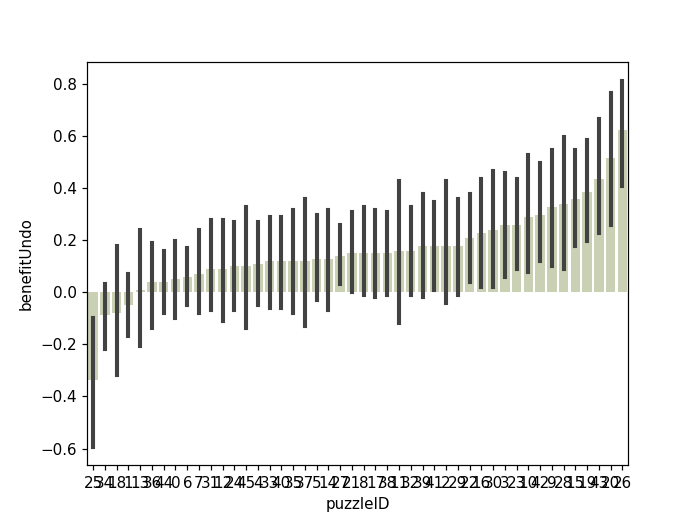

In [358]:
# bar plot for showing benefit of undo for each puzzle
order = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(1, 1)

# bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = single_condition_data, color = '#ccd5ae',order=sort_order.index) 
bx = sns.barplot(x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 



<IPython.core.display.Javascript object>


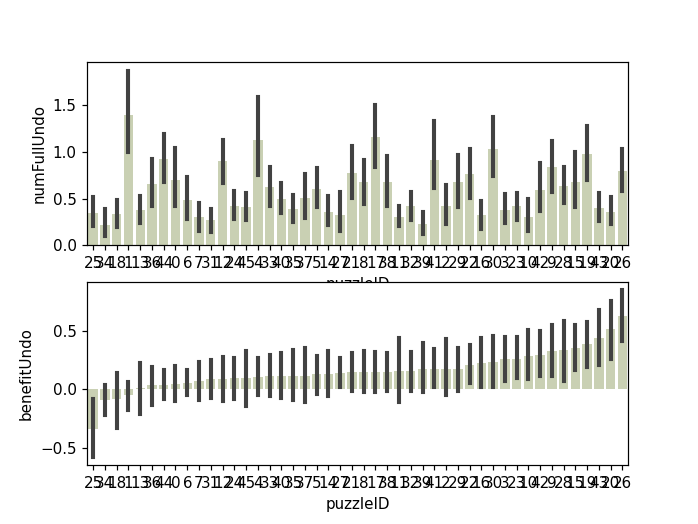

In [388]:
# bar plot for showing benefit of undo for each puzzle
order = df.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(2, 1)

bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[1], x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 



In [395]:
iis = []

for i in range(46):
    a = np.array(df['benefitUndo'][df['puzzleID']==i])[sort_order2.index]
    b = np.zeros(np.array(df['benefitUndo'][df['puzzleID']==0]).shape)
    stat,p = ttest_ind(a,b)
    if p < 0.05:
        iis.append(i)
        print(i)

8
9
10
11
12
15
16
17
19
20
22
23
24
26
28
29
31
32
38
41
43


In [469]:
puzzleID = []
subjects = []
benefitUndo=[]
numUNDO = []
numFullUndo = []

wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])
undo_benefit = wundo_nct - woundo_nct

for i in iis:
    puzzleData = puzzleID_order_data[puzzleID_order_data['puzzleID']==i].copy()

    wundo_nct = np.array(puzzleData[puzzleData['condition']==1]['numCities'])
    woundo_nct = np.array(puzzleData[puzzleData['condition']==0]['numCities'])  
    
    undo_benefit = wundo_nct - woundo_nct
    puzzleID.extend(puzzleData[puzzleID_order_data['condition']==1]['puzzleID'].tolist())
    benefitUndo.extend(undo_benefit)
    subjects.extend(puzzleData[puzzleID_order_data['condition']==1]['subjects'].tolist())
    numUNDO.extend(puzzleData[puzzleID_order_data['condition']==1]['numUNDO'].tolist())
    numFullUndo.extend(puzzleData[puzzleID_order_data['condition']==1]['numFullUndo'].tolist())
    
data_ = {'puzzleID':puzzleID, 
         'subjects':subjects, 
         'benefitUndo':benefitUndo,
         'numUNDO':numUNDO, 
         'numFullUndo':numFullUndo }


import pandas as pd

# Calling DataFrame constructor on list
df = pd.DataFrame(data_)
print(df)


      puzzleID  subjects  benefitUndo  numUNDO  numFullUndo
0            8         1            0        6            1
1            8         2            0        0            0
2            8         3            0        0            0
3            8         4            1        0            0
4            8         5           -1       11            3
...        ...       ...          ...      ...          ...
2116        43        97            0        0            0
2117        43        98            0        1            1
2118        43        99            1        0            0
2119        43       100            1        0            0
2120        43       101            0        0            0

[2121 rows x 5 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


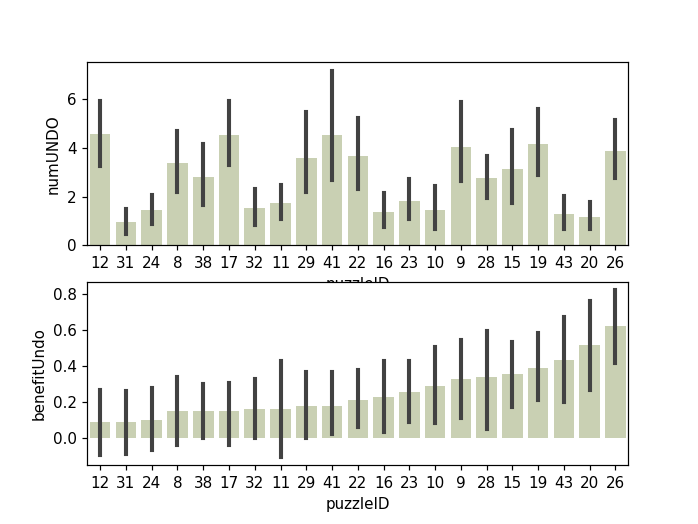

In [471]:
# bar plot for showing benefit of undo for each puzzle
order = df.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(2, 1)

# bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[0],x='puzzleID', y='numUNDO', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[1], x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 

In [484]:
rhos = []
for i in range(101):
    puzzleData = puzzleID_order_data[puzzleID_order_data['subjects']==i].copy()

    wundo_nct = np.array(puzzleData[puzzleData['condition']==1]['numCities'])
    woundo_nct = np.array(puzzleData[puzzleData['condition']==0]['numCities'])  
    
    undo_benefit = wundo_nct - woundo_nct

    coeff, p = scipy.stats.spearmanr(undo_benefit, puzzleData[puzzleData['condition']==1]['numUNDO'])
#     RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)

--------------------
nan
nan
--------------------
0.3631651257424391
0.013113840681134107
--------------------
-0.35755351832042637
0.014705341717949462
--------------------
0.15093076481592993
0.3167102795787435
--------------------
-0.2593813223557233
0.08173171257542174
--------------------
0.03799967148567463
0.8020274704483785
--------------------
0.21882599780793668
0.14399354875537723
--------------------
nan
nan
--------------------
-0.047455908226752566
0.7541436651962741
--------------------
0.08102841178512041
0.592429447309653
--------------------
0.25580244888231596
0.08618617965157778
--------------------
0.06072533928328276
0.6884974070402098
--------------------
-0.012013120240372856
0.9368437572457067
--------------------
0.15469053013808887
0.3046636067901064
--------------------
0.32964829440052057
0.025273505335402936
--------------------
0.2296132352158897
0.12477263777389118
--------------------
0.32256578549304604
0.02878996816508644
--------------------
0.018015

In [481]:
p

0.2112488066630932

In [482]:
h,p = ttest_ind(np.array(rhos),np.zeros(np.array(rhos).shape))

<IPython.core.display.Javascript object>


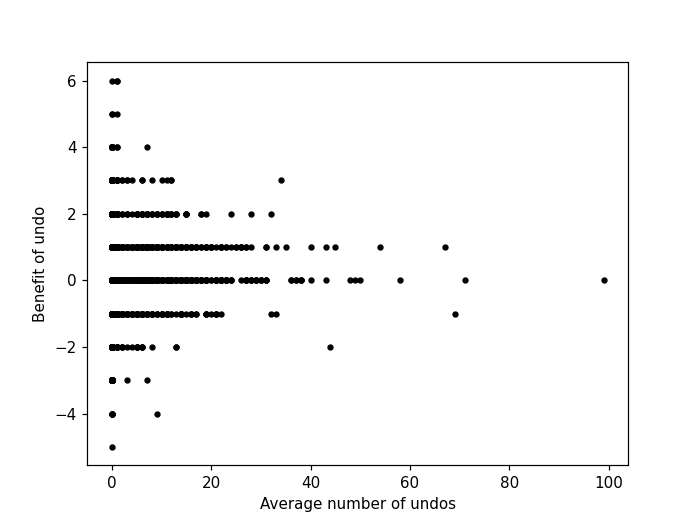

In [187]:
wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])

undo_benefit = wundo_nct - woundo_nct
num_undo = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numUNDO'])



fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(num_undo,undo_benefit,10,c='k')
ax1.set_xlabel("Average number of undos")
ax1.set_ylabel("Benefit of undo")
fig.savefig(out_dir + 'benefit_undo_tot.pdf', dpi=600, bbox_inches='tight')


In [36]:
# one rho per person
undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()



# spearman rho for individuals
import scipy
fig1, ax1 = plt.subplots()



subjects
1      0.239130
2      0.500000
3      0.043478
4      0.086957
5      0.456522
         ...   
97     0.717391
98     0.065217
99     1.152174
100    0.565217
101    0.000000
Name: numFullUndo, Length: 101, dtype: float64

<IPython.core.display.Javascript object>


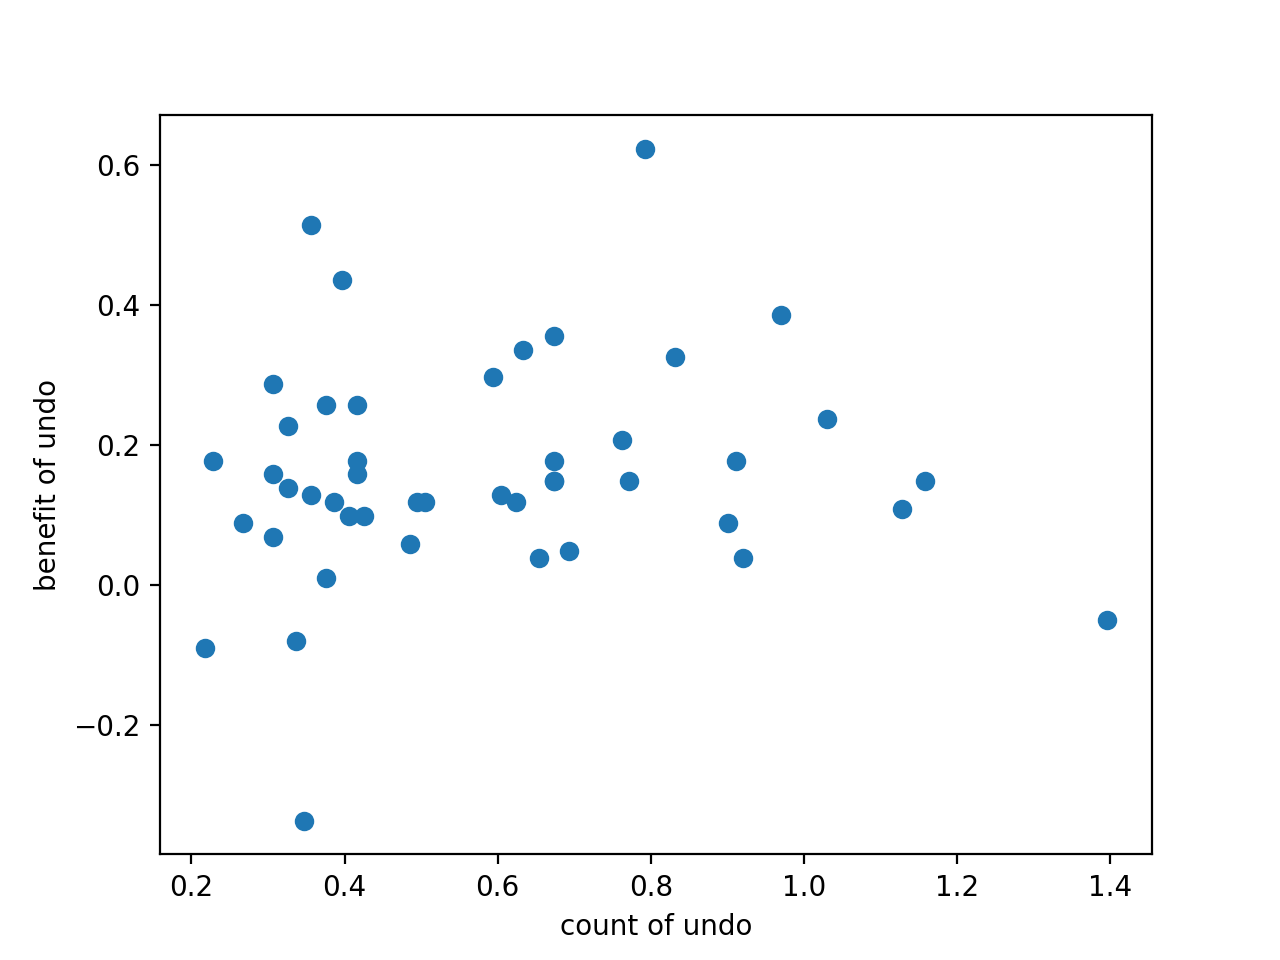

Text(0, 0.5, 'benefit of undo')

In [18]:
undo_benefit_puzzle = single_condition_data.groupby(['puzzleID'])['undo_benefit'].mean()
undo_count_puzzle = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean()
fig1, ax1 = plt.subplots()
ax1.plot(undo_count_puzzle,undo_benefit_puzzle,'o')
ax1.set_xlabel("average number of undo")
ax1.set_ylabel("benefit of undo")

In [59]:
%%R -i single_condition_data

single_condition_data$subjects <- factor(single_condition_data$subjects)
single_condition_data$puzzleID <- factor(single_condition_data$puzzleID)
# single_condition_data$numFullUndo[single_condition_data$numFullUndo >4] <- 4
# single_condition_data$numFullUndo <- factor(single_condition_data$numFullUndo)

str(single_condition_data)

'data.frame':	4646 obs. of  23 variables:
 $ index            : int  14 17 90 87 77 85 13 70 78 5 ...
 $ subjects         : Factor w/ 101 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ puzzleID         : Factor w/ 46 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ reward           : int  81 49 100 81 81 81 100 81 81 100 ...
 $ numCities        : int  9 7 10 9 9 9 10 9 9 10 ...
 $ mas              : int  9 7 10 10 10 9 10 9 9 10 ...
 $ nos              : int  104 6 70 34 4 5 180 3 10 2 ...
 $ leftover         : num  12.88 20.82 24.61 4.92 3.42 ...
 $ numError         : int  1 3 0 1 1 0 0 0 0 0 ...
 $ sumSeverityErrors: int  1 3 0 1 1 0 0 0 0 0 ...
 $ condition        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ numUNDO          : int  6 11 7 0 0 0 0 0 0 0 ...
 $ numFullUndo      : int  1 3 1 0 0 0 0 0 0 0 ...
 $ numEnd           : int  2 4 2 1 1 1 1 1 1 1 ...
 $ TT               : num  48.6 62.3 56.5 20.5 17.3 ...
 $ RT1              : num  6.99 12.95 5.71 6.92 3.96 ...
 $ RTlater   

In [60]:
%%R

model = lmer(undo_benefit_z ~ numFullUndo + (numFullUndo|subjects) + (numFullUndo|puzzleID),
                                  data=single_condition_data , control=lmerControl(optimizer="optimx",
                                                                   optCtrl=list(method="nlminb")))

# get the coefficients for the best fitting model
summary(model)

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
undo_benefit_z ~ numFullUndo + (numFullUndo | subjects) + (numFullUndo |  
    puzzleID)
   Data: single_condition_data
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: -7745.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9312 -0.2597 -0.1207  0.6837  5.2023 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr
 subjects (Intercept) 0.000e+00 0.0000000     
          numFullUndo 4.385e-05 0.0066223  NaN
 puzzleID (Intercept) 1.804e-04 0.0134331     
          numFullUndo 3.024e-07 0.0005499 1.00
 Residual             1.084e-02 0.1041335     
Number of obs: 4646, groups:  subjects, 101; puzzleID, 46

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.014493   0.002623 46.311252   5.526 1.45e-06 ***
numFullUndo  0.005099   0.001725  5.460095   2.956   0.0284 *  

1204 1209 
1205 1210 


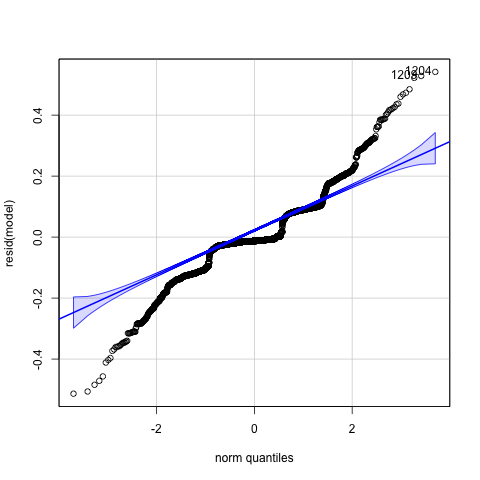

In [61]:
%%R
anova(model)
plot(model)

ranef(model)
## QQ-plots:
# par(mfrow = c(1, 2))
# qqnorm(ranef(model)$subjects[, 1], main = "Random effects of subjects")
# qqnorm(resid(model), main = "Residuals")

qqPlot(resid(model), distribution = "norm")

## count of error - number of optimal solutions

<IPython.core.display.Javascript object>


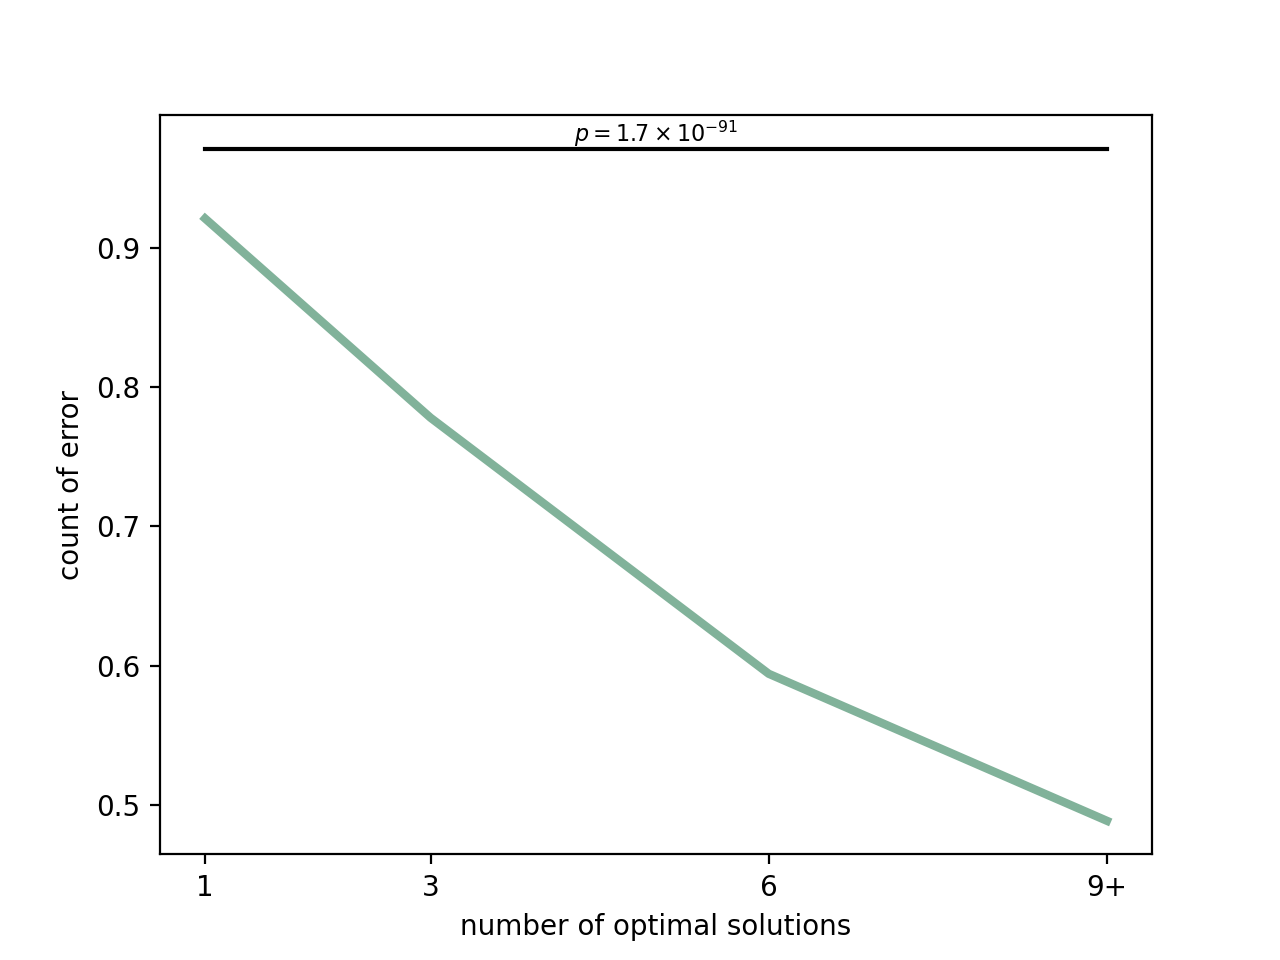

In [19]:
error_basic = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numError']) 
# error_undo = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numError']) 

n_optimal = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['nos'])

bins1 = stats.binned_statistic(n_optimal, error_basic, 'mean', bins=[1,3,6,9,100])
# bins2 = stats.binned_statistic(n_optimal, error_undo, 'mean', bins=[1,3,6,9,15])

fig, axs = plt.subplots()         
axs.plot(bins1[1][:-1], bins1[0], color = '#81b29a', linewidth=3,label='basic')
# axs.plot(bins2[1][:-1], bins2[0],linewidth=3,label='undo')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(error_basic[(n_optimal<3) & (n_optimal>=1)], error_basic[(n_optimal<6) & (n_optimal>=3)], error_basic[(n_optimal<9) & (n_optimal>=6)],error_basic[n_optimal>=9])
x1, x2 = 1,9
y, h, col = bins1[0][0] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

axs.set_xlabel('number of optimal solutions')
axs.set_ylabel('count of error')
axs.set_xticks([1,3,6,9])
axs.set_xticklabels([1,3,6,'9+'])
# axs.legend()
fig.savefig(out_dir + 'error_optimal.png', dpi=600, bbox_inches='tight')
